In [1]:
# make imports from pa_lib possible (parent directory of file's directory)
import sys
from pathlib import Path

file_dir = Path.cwd()
parent_dir = file_dir.parent
sys.path.append(str(parent_dir))

%load_ext autoreload
%autoreload

import pandas as pd
import numpy as np

from collections import namedtuple

from pa_lib.file import (
    store_bin,
    project_dir,
    data_files,
    load_csv,
    load_bin,
    write_xlsx,
    load_txt
)
from pa_lib.data import as_dtype, dtFactor, desc_col, lookup, clean_up_categoricals
from pa_lib.util import collect, value, flatten, normalize_rows, list_items
from pa_lib.log import time_log
from pa_lib.types import Record

# display long columns completely, show more rows
pd.set_option("display.max_colwidth", 300)
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)

# Load data files

In [2]:
with project_dir("MediaFocus"):
    display(data_files("*.feather"))
    br_kw = load_bin("branchen_kw_10y.feather")
    br_pg_kw = load_bin("branchen_pg_kw_10y.feather")
    br_wbt_kw = load_bin("branchen_wbt_kw.feather")

,size,mtime
name,,
branchen_kw_10y.feather,228.2 KB,31.10.19 17:55:05
branchen_pg_kw_10y.feather,1.3 MB,31.10.19 17:55:05
branchen_wbt_kw.feather,40.2 MB,31.10.19 17:55:05


17:55:37 [INFO] Started loading binary file
17:55:37 [INFO] Reading from file C:\Users\kpf\data\MediaFocus\branchen_kw_10y.feather
17:55:37 [INFO] Finished loading binary file in 0.03s (0.02s CPU)
17:55:37 [INFO] Started loading binary file
17:55:37 [INFO] Reading from file C:\Users\kpf\data\MediaFocus\branchen_pg_kw_10y.feather
17:55:37 [INFO] Finished loading binary file in 0.0s (0.02s CPU)
17:55:37 [INFO] Started loading binary file
17:55:37 [INFO] Reading from file C:\Users\kpf\data\MediaFocus\branchen_wbt_kw.feather
17:55:37 [INFO] Finished loading binary file in 0.05s (0.05s CPU)


In [6]:
br_kw.head()

,Jahr,Branche,KW,Brutto
0,2009,"BAUEN, INDUSTRIE, EINRICHTUNG",KW_01,1475891
1,2009,DETAILHANDEL,KW_01,3809664
2,2009,DIENSTLEISTUNG,KW_01,1868443
3,2009,DIGITAL + HAUSHALT,KW_01,1956595
4,2009,ENERGIE,KW_01,102356


# Find patterns

In [9]:
plot_data = br_kw.groupby(["Branche", "Jahr"]).agg(sum).unstack()

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

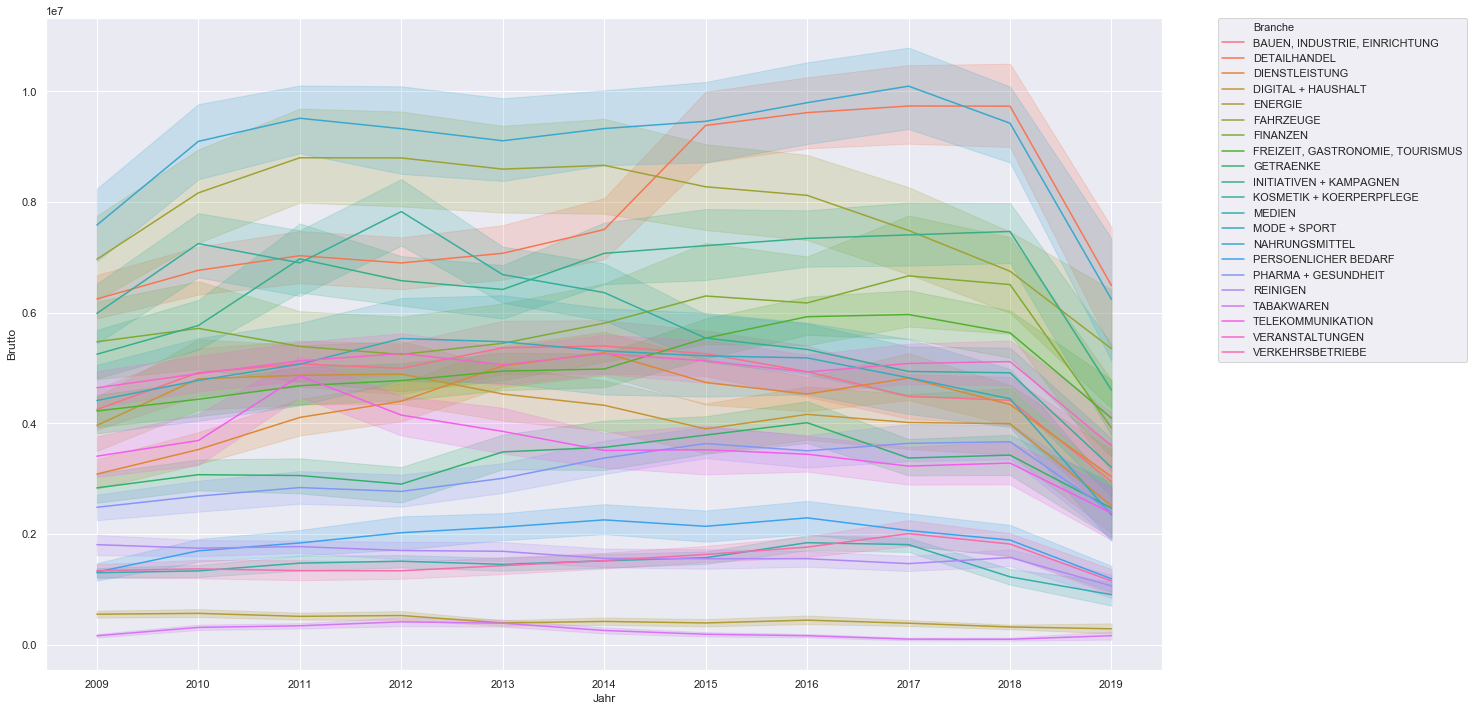

In [18]:
plt.figure(figsize=(20, 12))
sns.lineplot(data=br_kw, x="Jahr", y="Brutto", hue="Branche")
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)